In [1]:
import geopandas as gpd
import shapely
import glob

from shapely.geometry import Polygon
from shapely.ops import unary_union
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
rd_string = ("+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 "
             "+k=0.999908 +x_0=155000 +y_0=463000 +ellps=bessel +units=m "
             "+towgs84=565.2369,50.0087,465.658,-0.406857330322398,0.350732676542563,-1.8703473836068,4.0812 "
             "+no_defs +no_defs")

In [4]:
path = r'D:\Projects\Pr\3317.50\Toeleveringen\20190430_update_baggervakken'
shp_files = glob.glob(r'{}\**\*.shp'.format(path), recursive=True)
print(shp_files, len(shp_files))

['D:\\Projects\\Pr\\3317.50\\Toeleveringen\\20190430_update_baggervakken\\40. 1.7.2.3.1.B Harlingen - Noordzee, Blauwe Slenk\\190501_Harlingen-Noordzee, BS.shp', 'D:\\Projects\\Pr\\3317.50\\Toeleveringen\\20190430_update_baggervakken\\41. 1.7.2.1.1 Slenk\\190501_Slenk.shp', 'D:\\Projects\\Pr\\3317.50\\Toeleveringen\\20190430_update_baggervakken\\42. 1.7.2.1.1.B Harlingen - Terschelling, Schuitengat\\190501_Terschelling, Schuitengat.shp', 'D:\\Projects\\Pr\\3317.50\\Toeleveringen\\20190430_update_baggervakken\\43. 1.7.3.1.C Holwerd - Ameland, VA4 - Reegeul\\190501_Va4-RG.shp', 'D:\\Projects\\Pr\\3317.50\\Toeleveringen\\20190430_update_baggervakken\\44. 1.7.3.1.3 Reegeul\\190501_RG.shp'] 5


In [10]:
gdf_comb = gpd.GeoDataFrame()

In [11]:
for idx, shp in enumerate(shp_files):
    print(idx, shp)
    
    gdf = gpd.read_file(shp)
    gdf.crs = rd_string

    end = 21000101
    # bulk start date
    start = 20190430 #20-08-2018

    # for specific vakken set the start and objectcode
    if '190501_Harlingen-Noordzee, BS' in shp:
        #start = 20181012
        objectcode = '1.7.2.3.1.B'# 1.7.1.3.2.2'     
    
    if '190501_Slenk' in shp:
        #start = 20190330    
        objectcode = '1.7.2.1.1'       
        
    if '190501_Terschelling, Schuitengat' in shp:
        #start = 20190330
        objectcode = '1.7.2.1.1.B'     
        
    if '190501_Va4-RG' in shp:
        #start = 20190330
        objectcode = '1.7.3.1.C'   
        
    if '190501_RG' in shp:
        #start = 20190330
        objectcode = '1.7.3.1.3'           
    
#     # for remaining only map the objectcode and use bulk start date for date
#     if '181105_Terschelling, Schuitengat' in shp:  
#         objectcode = '1.7.2.1.1.B'  
    
#     if '181105_Va6-Va9' in shp: 
#         objectcode = '1.7.3.1.B'      
    
#     if '181105_Va9-Va13' in shp:
#         objectcode = '1.7.3.1.2.B'            


    gdf.loc[0,'geometry'] = Polygon(gdf.geometry[0])    
    gdf['START'] = pd.Series([start], index=gdf.index)
    gdf['END'] = pd.Series([end], index=gdf.index)
    gdf['OBJECTCODE'] = pd.Series([objectcode], index=gdf.index)
    
    gdf_comb = gdf_comb.append(gdf)#, ignore_index=True)

0 D:\Projects\Pr\3317.50\Toeleveringen\20190430_update_baggervakken\40. 1.7.2.3.1.B Harlingen - Noordzee, Blauwe Slenk\190501_Harlingen-Noordzee, BS.shp
1 D:\Projects\Pr\3317.50\Toeleveringen\20190430_update_baggervakken\41. 1.7.2.1.1 Slenk\190501_Slenk.shp
2 D:\Projects\Pr\3317.50\Toeleveringen\20190430_update_baggervakken\42. 1.7.2.1.1.B Harlingen - Terschelling, Schuitengat\190501_Terschelling, Schuitengat.shp
3 D:\Projects\Pr\3317.50\Toeleveringen\20190430_update_baggervakken\43. 1.7.3.1.C Holwerd - Ameland, VA4 - Reegeul\190501_Va4-RG.shp
4 D:\Projects\Pr\3317.50\Toeleveringen\20190430_update_baggervakken\44. 1.7.3.1.3 Reegeul\190501_RG.shp


In [12]:
gdf_comb.reset_index(drop=True)

geometry     START       END  \
0  POLYGON ((149448.361 580248.868, 149248.334 58...  20190430  21000101   
1  POLYGON ((146098.900477067 592526.6278442435, ...  20190430  21000101   
2  POLYGON ((143852.9513721167 596378.7145864532,...  20190430  21000101   
3  POLYGON ((180171.8902708007 604830.4328130542,...  20190430  21000101   
4  POLYGON ((180661.16788196 605204.4616790394, 1...  20190430  21000101   

    OBJECTCODE  
0  1.7.2.3.1.B  
1    1.7.2.1.1  
2  1.7.2.1.1.B  
3    1.7.3.1.C  
4    1.7.3.1.3

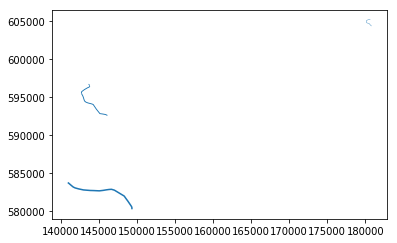

In [13]:
gdf_comb.plot()

In [14]:
g1 = gdf_comb['geometry'].iloc[0]

### read current valid shapefile

In [15]:
shp_baggervakken = r"D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken.shp"
df_bgv = gpd.read_file(shp_baggervakken)
df_bgv.head()

ACTIVITEIT  AREA_REAL  DEFAULT_1 DIEPTE_MAX DIEPTE_MIN       END FRQ_EXC_50  \
0       Taak   482618.0        1.0        8.0        7.5  20180417          4   
1   Raamact.   130306.0        1.0        4.0        3.5  20180410          4   
2       Taak   228639.0        1.0        4.0        3.8  20180209         12   
3       Taak    29065.0        1.0        4.0        3.8  20180209         12   
4       Taak    38257.0        1.0        4.0        3.8  20180209         12   

  FRQ_INC_50 FRQ_SURV GUN_DAGEN  ... WBO_DAGEN  \
0          2        6      -999  ...       404   
1          2        6      -999  ...       401   
2          4       12      -999  ...       403   
3          4       12      -999  ...       403   
4          4       12      -999  ...       403   

                                            WBO_FILE WBO_GELDIG  WBO_M_DAT  \
0  KRD15-8600-6024-RAP-013a_harlingen-terschellin...    43030.0    42299.0   
1    DOM15-8600-6024-RAP-012a_den_oever-noordzee.pdf    43027.0    42296.0   
2       KRD15-8600-6024-RAP-014a_holwerd-ameland.pdf    43029.0    42298.0   
3       KRD15-8600-6024-RAP-014a_holwerd-ameland.pdf    43029.0    42298.0   
4       KRD15-8600-6024-RAP-014a_holwerd-ameland.pdf    43029.0    42298.0   

  WBO_R_DAT   X_LABEL   Y_LABEL         layer  \
0   42332.0  149590.0  579048.0  Baggervakken   
1   42319.0  130187.0  552283.0  Baggervakken   
2   42325.0  185655.0  601008.0  Baggervakken   
3   42325.0  181012.0  604198.0  Baggervakken   
4   42298.0  180144.0  604998.0  Baggervakken   

                                                path  \
0  D:/Projects/Pr/3317.30/Toelevering/20190118_up...   
1  D:/Projects/Pr/3317.30/Toelevering/20190118_up...   
2  D:/Projects/Pr/3317.30/Toelevering/20190118_up...   
3  D:/Projects/Pr/3317.30/Toelevering/20190118_up...   
4  D:/Projects/Pr/3317.30/Toelevering/20190118_up...   

                                            geometry  
0  POLYGON ((149442.7124357932 580249.0740603911,...  
1  POLYGON ((129625.932283378 552658.7841377998, ...  
2  POLYGON ((185317.6546756364 601556.7232466646,...  
3  POLYGON ((181240.1501464844 604087.0973510742,...  
4  POLYGON ((180660.1662909701 605207.5438269211,...  

[5 rows x 42 columns]

## append new shapes baggervakken

In [16]:
df_bg_new = df_bgv.append(gdf_comb)

c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [17]:
# reset and drop the index
df_bg_new.reset_index(drop=True, inplace=True)

### change END date last valid feature
### and copyover other metadata to new valid feature

In [18]:
for idx,val in gdf_comb.iterrows():
    print(val['OBJECTCODE'])
    obj_code = val['OBJECTCODE']
    df_sel = df_bg_new[df_bg_new['OBJECTCODE']==obj_code]
    
    # only select latest two known baggervakken
    df_sel.START = df_sel.START.astype(int)
    df_iter_two_row = df_sel.sort_values(by=['START'], ascending=False)[0:2]

    # copy all column values except column START, END and geometry
    unwanted = {'START','END','geometry'}
    item_list = [e for e in df_iter_two_row.columns if e not in unwanted]
    df_iter_two_row.loc[(df_iter_two_row.index.isin(df_iter_two_row.index[:1])), item_list] = df_iter_two_row.loc[(
        df_iter_two_row.index.isin(df_iter_two_row.index[1:])), item_list].values

    # change END date of former valid feature to START date of existing valid baggervak
    df_iter_two_row.END.iloc[1] = df_iter_two_row.START.iloc[0]    
    print(df_iter_two_row.loc[:,['END','START', 'OBJECTCODE', 'OBJECTNAAM']])
    
    # set adapted row in the bigger geodataframe
    df_bg_new.iloc[df_iter_two_row.index] = df_iter_two_row    

1.7.2.3.1.B
          END     START   OBJECTCODE                          OBJECTNAAM
146  21000101  20190430  1.7.2.3.1.B  Harlingen - Noordzee, Blauwe Slenk
120  20190430  20171117  1.7.2.3.1.B  Harlingen - Noordzee, Blauwe Slenk
1.7.2.1.1


c:\programdata\miniconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
c:\programdata\miniconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


          END     START OBJECTCODE OBJECTNAAM
147  21000101  20190430  1.7.2.1.1      Slenk
137  20190430  20181105  1.7.2.1.1      Slenk
1.7.2.1.1.B
          END     START   OBJECTCODE                             OBJECTNAAM
148  21000101  20190430  1.7.2.1.1.B  Harlingen - Terschelling, Schuitengat
138  20190430  20181105  1.7.2.1.1.B  Harlingen - Terschelling, Schuitengat
1.7.3.1.C
          END     START OBJECTCODE                        OBJECTNAAM
149  21000101  20190430  1.7.3.1.C  Holwerd - Ameland, VA4 - Reegeul
132  20190430  20180417  1.7.3.1.C  Holwerd - Ameland, VA4 - Reegeul
1.7.3.1.3
          END     START OBJECTCODE OBJECTNAAM
150  21000101  20190430  1.7.3.1.3    Reegeul
133  20190430  20180417  1.7.3.1.3    Reegeul


# update 'AREA_REAL' column for new area in m2

In [19]:
df_bg_new.loc[:,'AREA_REAL'] = np.round(df_bg_new['geometry'].area, 0)

#### save to new shapefile

In [20]:
new_path = r'D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken_20190430.shp'
df_bg_new.to_file(new_path)

In [ ]:
df_bg_new.plot()

In [ ]:
df_bg_new.columns

In [ ]:
df_selection = df_bg_new[df_bg_new['OBJECTCODE'] == '1.7.3.1.2.B']

In [ ]:
df_custom = df_selection[['OBJECTNAAM', 'geometry']].reset_index(drop=True)

In [ ]:
df_custom.to_file('')

In [ ]:
duplicates_all = df_bg_new[df_bg_new['OBJECTCODE'].duplicated(keep=False)]

In [ ]:
duplicates_all.index

In [21]:
# EDIT: 2018-09-21 this is properly handled in above code
## FURTHER CHANGES APPLIED IN QGIS (FILL COLUMN AND CHANGING END DATE OF PREVIOUS VALID BAGGERVAK)
# /EDIT

In [22]:
## VALIDATE  NEW BAGGERVAKKEN

In [23]:
rd_string = ("+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 "
             "+k=0.999908 +x_0=155000 +y_0=463000 +ellps=bessel +units=m "
             "+towgs84=565.2369,50.0087,465.658,-0.406857330322398,0.350732676542563,-1.8703473836068,4.0812 "
             "+no_defs +no_defs")

In [24]:
def baggervak_to_current(path_shp, crs_string):
    """
    function to get current valid baggervakken
    also sets appropriate coordinates system
    """

    gdf = gpd.read_file(path_shp)
    #gdf.crs = rd_string

    # only get currently valid shapes
    # get list of duplicates (both the first and last [and middles if available])
    duplicates_all = gdf[gdf['OBJECTCODE'].duplicated(keep=False)]
    for obj in duplicates_all['OBJECTCODE'].unique():
        duplicates_single = duplicates_all.loc[duplicates_all['OBJECTCODE'] == obj]
        rows2drop = duplicates_single.loc[duplicates_single['END']
                                          != duplicates_single['END'].max()]
        gdf.drop(rows2drop.index.tolist(), axis=0, inplace=True)
        
    gdf = gdf[gdf['END']=='21000101']
    
    
    return gdf

In [25]:
#shp_baggervakken = r"D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken_20180921.shp"
shp_baggervakken = r'D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken_20190430.shp'

In [26]:
bgf_val = baggervak_to_current(shp_baggervakken, rd_string)

In [27]:
len(bgf_val['OBJECTCODE'].unique())

78

In [28]:
len(bgf_val['OBJECTCODE'])

78

In [29]:
np.sort(bgf_val['OBJECTCODE'].unique())#.sort()

array(['1.7.1.1', '1.7.1.1.1.1', '1.7.1.1.1.2', '1.7.1.1.1.3',
       '1.7.1.1.2.1', '1.7.1.1.2.2', '1.7.1.1.2.3', '1.7.1.1.2.4',
       '1.7.1.1.2.5', '1.7.1.1.2.6', '1.7.1.2', '1.7.1.3.1',
       '1.7.1.3.1.A', '1.7.1.3.1.B', '1.7.1.3.2.1', '1.7.1.3.2.2',
       '1.7.1.3.2.4', '1.7.1.3.2.5', '1.7.1.3.2.6', '1.7.1.4.1.1',
       '1.7.1.4.A', '1.7.1.4.B', '1.7.1.4.C', '1.7.1.5.1', '1.7.1.5.2',
       '1.7.1.5.3', '1.7.2.1.1', '1.7.2.1.1.A', '1.7.2.1.1.B',
       '1.7.2.1.2.1', '1.7.2.1.2.2', '1.7.2.2.1', '1.7.2.2.1.A',
       '1.7.2.2.1.B', '1.7.2.2.2.1', '1.7.2.2.2.2', '1.7.2.2.3.1',
       '1.7.2.2.3.2', '1.7.2.3.1', '1.7.2.3.1.A', '1.7.2.3.1.B',
       '1.7.2.3.1.C', '1.7.2.3.1.D', '1.7.2.3.2', '1.7.2.3.3',
       '1.7.3.1.1', '1.7.3.1.2.A', '1.7.3.1.2.B', '1.7.3.1.3',
       '1.7.3.1.4.1', '1.7.3.1.4.2', '1.7.3.1.4.3', '1.7.3.1.5.1',
       '1.7.3.1.5.2', '1.7.3.1.5.3', '1.7.3.1.5.4', '1.7.3.1.5.5',
       '1.7.3.1.A', '1.7.3.1.B', '1.7.3.1.C', '1.7.3.2.1.1',
       '1.7.3.2.1.2', 

In [30]:
bgf_val.to_file(r'D:\Projects\Pr\3317.50\Verzending\20190430_update_baggervakken//Baggervakken-vanaf-30-april-2019.shp')